# Artificial Intelligence

### Lecturer: Tai Le Quy

28.7.2023

In this tutorial we will demonstrate an example of classification model (supervised learning) on the Iris dataset.


### Load the dataset

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class-label']
classnames = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
dataset = pd.read_csv(url, names=names)
dataset.sample(10) # prints a ten random samples

,sepal-length,sepal-width,petal-length,petal-width,class-label
125,7.2,3.2,6.0,1.8,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica
34,4.9,3.1,1.5,0.1,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor


`pandas` makes it easy to get an overview of the dataset and its statistics:

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class-label   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can also filter the dataset based on features or instances quite easily:

In [4]:
dataset['sepal-length'] # selects the 'sepal-length' feature column

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal-length, Length: 150, dtype: float64

In [5]:
dataset['class-label'] # selects the class-labels

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class-label, Length: 150, dtype: object

In [6]:
dataset[dataset['class-label'] == 'Iris-setosa'] # filters the dataset based on a specific class label

,sepal-length,sepal-width,petal-length,petal-width,class-label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Apply decision tree classification model on Iris data set

In [4]:
# Dividing data into features and labels
X = dataset.iloc[:, 0:4].values
Y = dataset.iloc[:, 4].values

In [7]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

<b>Label encoding </b>
<br>
As we can see labels are categorical. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.
</br>

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [9]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<b>Spliting dataset into training set and test set </b>
<br>
Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.
We split 80% data for training and 20% for testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 0)
#random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. 
#If you don't set a seed, it is different each time.

Lastly, because features values are in the same order of magnitude, there is no need for feature scaling. Nevertheless in other sercostamses it is extremly important to apply feature scaling before running classification algorithms.

<b>Making predictions</b>

In [19]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Call decision tree
clf = tree.DecisionTreeClassifier(random_state=0)

# Fitting the model
clf.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = clf.predict(X_test)

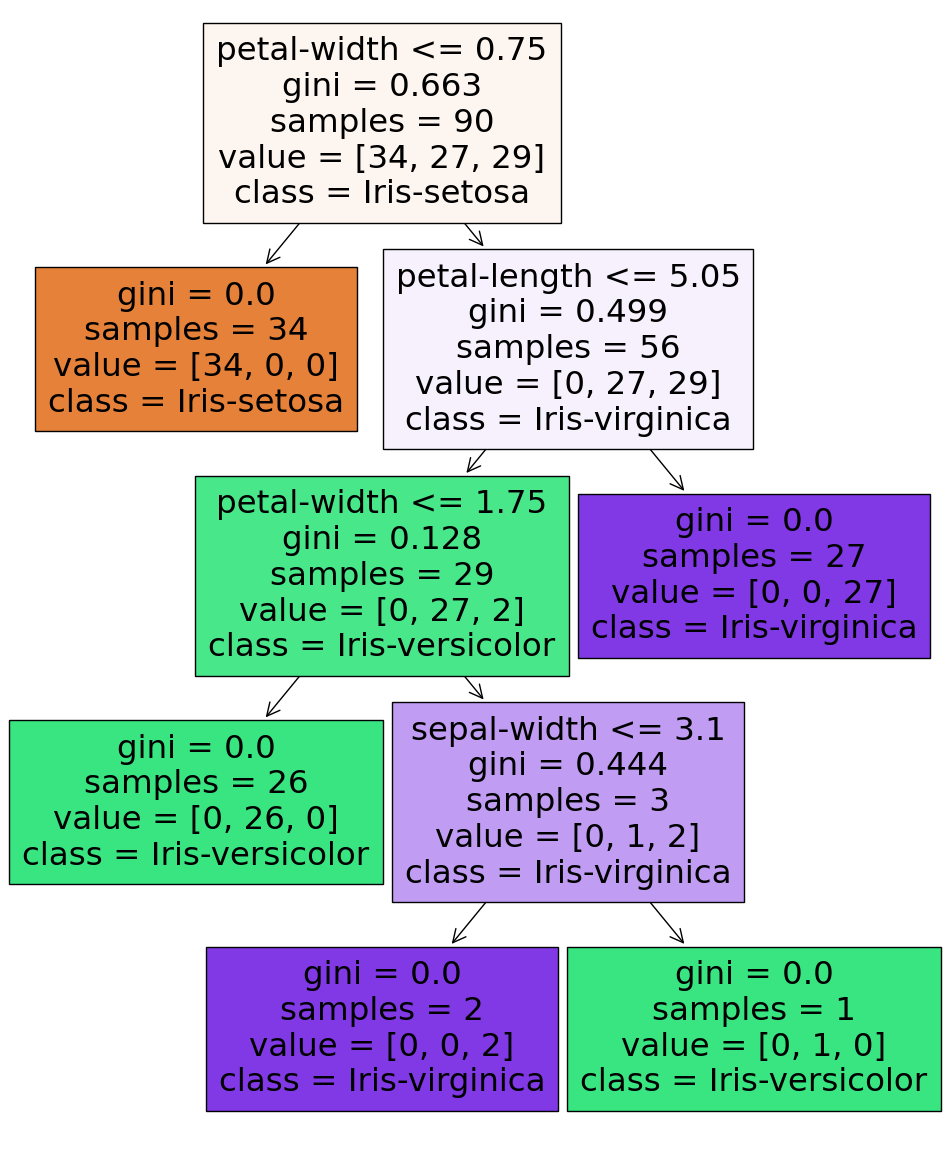

In [20]:
#Plot the decision tree
import matplotlib.pyplot as plt #Library for plot
plt.figure(figsize = (12,15), dpi = 100)
tree.plot_tree(clf,filled=True,feature_names = names,class_names=classnames)
plt.savefig("Iris-decision-tree.pdf",bbox_inches='tight')
plt.show()

<b>Evaluating predictions </b>

In [21]:
# Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix
[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]


In [22]:
#Accuracy
print("Accuracy")
print(accuracy_score(Y_test, Y_pred))

Accuracy
0.95


In [23]:
#Summary
print("Summary")
print(classification_report(Y_test, Y_pred))

Summary
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.96      0.94        23
           2       0.95      0.90      0.93        21

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



## Homework

- Apply the decision tree classification with a similar process to forcast whether a customer is 'good' or 'bad' in the German credit dataset: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data). 
- Report the results on accuracy, precision, recall and F-score measures.